In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
pd.set_option("display.max_columns", 50)

In [3]:
df = pd.read_excel('WQ_updated_with_WQI.xlsx')

In [4]:
df.head()

,WRIS ID,PH,EC,TOT_ALKALINITY,CA,MG,NA,FE,CHLORIDE,SULPHATE,NITRATE,FLUORIDE,TDS,Total_hardness,WQI,GRADE,QUALITY
0,W23881,8.34,355.0,160.0,22.0,18.225,25.70,1.288,17.725,3.21,3.63,0.37,217.748,129.7225,52.765156,C,Poor
1,W38814,8.46,596.0,205.0,14.0,20.655,75.67,0.125,38.995,46.22,2.46,0.24,360.745,119.6855,81.601765,D,Very poor
2,W24111,8.24,429.0,150.0,10.0,32.805,23.32,0.183,31.905,24.15,0.06,0.68,243.370,159.5005,60.979152,C,Poor
3,W38806,8.21,1077.0,165.0,18.0,70.470,85.95,0.120,124.075,47.48,184.20,0.16,681.918,333.9270,153.279010,E,Unsuitable
4,W38807,8.17,394.0,135.0,14.0,34.020,15.24,0.648,38.995,8.22,0.30,0.62,233.172,174.4820,57.871346,C,Poor


In [5]:
df.describe()

,PH,EC,TOT_ALKALINITY,CA,MG,NA,FE,CHLORIDE,SULPHATE,NITRATE,FLUORIDE,TDS,Total_hardness,WQI
count,2265.000000,2265.000000,2265.000000,2265.000000,2265.000000,2265.000000,2265.000000,2265.000000,2265.000000,2265.000000,2265.000000,2265.000000,2265.000000,2265.000000
mean,7.854921,1721.624053,279.665827,65.002838,49.507453,237.325095,0.819141,315.622044,130.707774,42.810353,0.821678,1116.492922,365.487652,237.485872
std,0.496979,2310.915386,204.695879,85.712863,71.914844,400.297423,1.866056,680.682456,238.335605,90.460508,1.061637,1520.974005,458.009708,310.577932
min,5.029000,30.400000,5.000000,2.000000,1.205825,0.030000,0.001000,3.545000,-0.466207,0.014500,0.001000,18.100000,9.975727,7.155074
25%,7.610000,478.400000,135.108000,26.000000,14.597797,29.950000,0.100000,38.995000,14.699311,3.000000,0.240000,282.307000,144.805825,67.772359
50%,7.960000,990.000000,240.163934,44.000000,29.250000,92.000000,0.254000,99.000000,44.000000,14.800000,0.536000,643.500000,249.798400,142.793491
75%,8.210000,2100.000000,369.672131,77.000000,53.539808,290.000000,0.690000,321.000000,139.000000,44.000000,1.080000,1373.500000,409.431200,293.658169
max,9.300000,48500.000000,2460.163934,2351.000000,1336.588980,8185.000000,27.780000,18050.000000,2518.000000,1600.000000,25.000000,31525.000000,9434.725600,6617.374061


In [6]:
df.columns

Index(['WRIS ID', 'PH', 'EC', 'TOT_ALKALINITY', 'CA', 'MG', 'NA', 'FE',
       'CHLORIDE', 'SULPHATE', 'NITRATE', 'FLUORIDE', 'TDS', 'Total_hardness',
       'WQI', 'GRADE', 'QUALITY'],
      dtype='object')

C:\Coding\User\anaconda3\envs\Env1\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='WQI', ylabel='Density'>

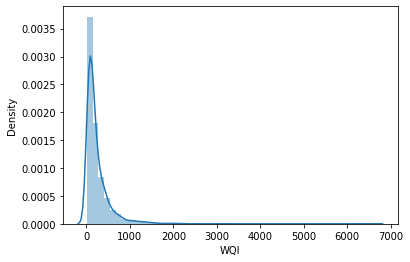

In [7]:
sns.distplot(df['WQI'])

<AxesSubplot:xlabel='PH', ylabel='TOT_ALKALINITY'>

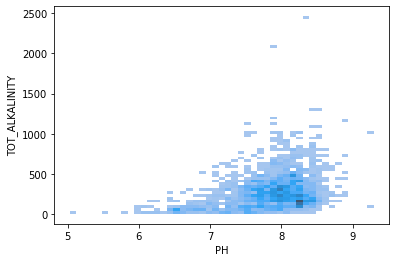

In [8]:
sns.histplot(x = df['PH'], y = df['TOT_ALKALINITY'])

Text(0.5, 1.0, 'Correlation Heatmap')

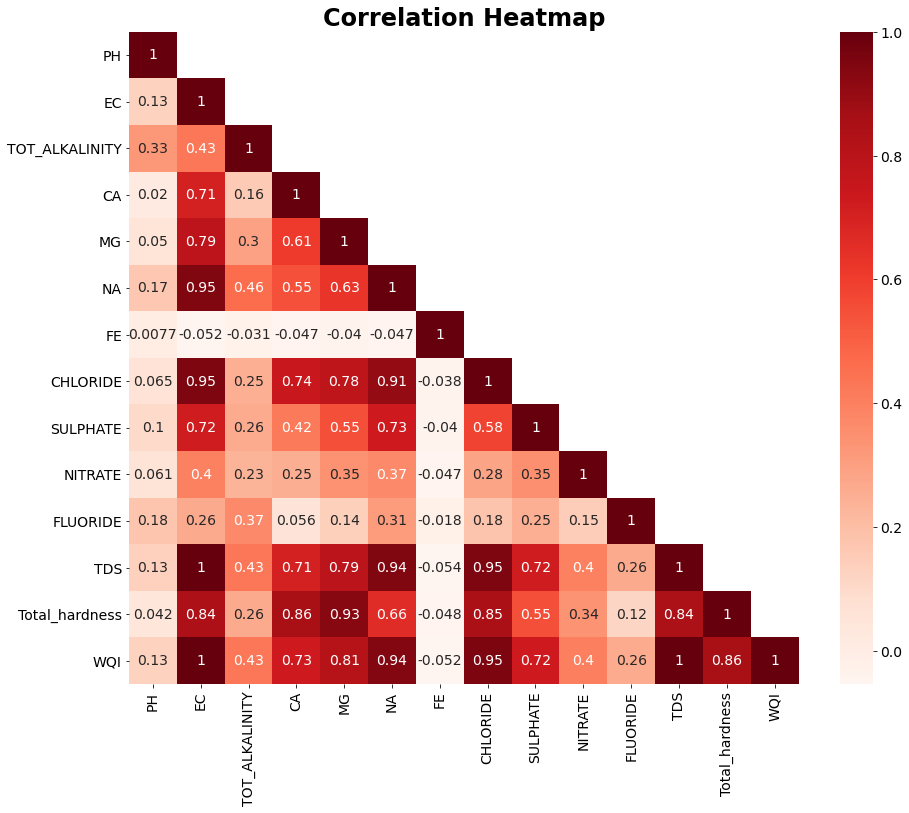

In [9]:
fig, ax = plt.subplots(figsize=(15,12))


matrix = np.triu(df.corr(), 1)

res = sns.heatmap(df.corr(), annot=True, cmap='Reds', annot_kws={'size': 14}, mask=matrix)

res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 14)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 14)
cbar = res.collections[0].colorbar
# here set the labelsize by 20
cbar.ax.tick_params(labelsize=14)
plt.title('Correlation Heatmap', fontsize = 24, fontweight = 'bold' )

#plt.savefig("Heatmap.png", dpi=300)

In [33]:
# LinearRegression :

In [10]:
X = df[['PH', 'EC', 'TOT_ALKALINITY', 'CA', 'MG', 'NA', 'FE',
       'CHLORIDE', 'SULPHATE', 'NITRATE', 'FLUORIDE', 'TDS', 'Total_hardness']]
y = df['WQI']

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
lm = LinearRegression()

In [15]:
lm.fit(X_train,y_train)

LinearRegression()

In [16]:
# print the intercept
print(lm.intercept_)

-2.175215239788969


In [17]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
PH,0.310745
EC,0.054837
TOT_ALKALINITY,0.054837
CA,0.022929
MG,0.002507
NA,0.054837
FE,0.054837
CHLORIDE,0.054837
SULPHATE,0.054837
NITRATE,0.054837


In [18]:
predictions = lm.predict(X_test)

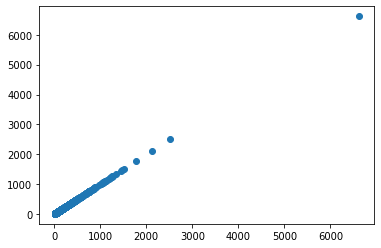

In [19]:
plt.scatter(y_test,predictions)

C:\Coding\User\anaconda3\envs\Env1\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


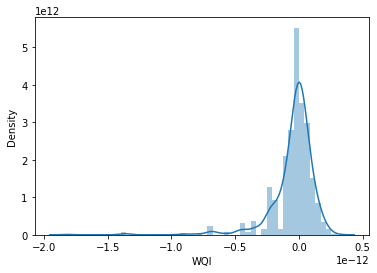

In [20]:
sns.distplot((y_test-predictions),bins=50);

In [21]:
from sklearn import metrics

In [22]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1.0064943727615029e-13
MSE: 3.304461796790279e-26
RMSE: 1.8178178667815649e-13
